In [392]:
import keras
from IPython.display import Image, display
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, Dropout, LeakyReLU, Activation
from keras.models import Model
from keras.optimizers import Adam

In [393]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

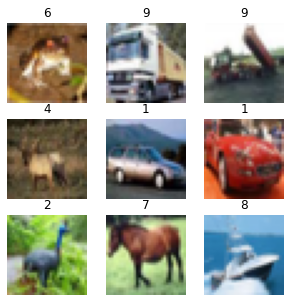

In [394]:
plt.figure(figsize=(5, 5))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(int(y_train[i]))
    plt.axis("off")

In [395]:
NUM_CLASSES = 10

In [396]:
# data comes in integers between 0 and 255 for each pixel channel
# convert to a range between –1 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train[0][0]

array([[0.23137255, 0.24313726, 0.24705882],
       [0.16862746, 0.18039216, 0.1764706 ],
       [0.19607843, 0.1882353 , 0.16862746],
       [0.26666668, 0.21176471, 0.16470589],
       [0.38431373, 0.28627452, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509807, 0.41960785, 0.29411766],
       [0.5686275 , 0.43137255, 0.3137255 ],
       [0.58431375, 0.45882353, 0.34901962],
       [0.58431375, 0.47058824, 0.3647059 ],
       [0.5137255 , 0.40392157, 0.3019608 ],
       [0.49019608, 0.3882353 , 0.29803923],
       [0.5568628 , 0.4509804 , 0.35686275],
       [0.5647059 , 0.4392157 , 0.3372549 ],
       [0.5372549 , 0.4117647 , 0.30980393],
       [0.5058824 , 0.38039216, 0.2784314 ],
       [0.5372549 , 0.41568628, 0.30980393],
       [0.5254902 , 0.41568628, 0.29803923],
       [0.4862745 , 0.38039216, 0.2509804 ],
       [0.54509807, 0.44313726, 0.30588236],
       [0.54509807, 0.4392157 , 0.29411766],
       [0.52156866, 0.4117647 , 0.27058825],
       [0.

In [397]:
x_train.shape

(50000, 32, 32, 3)

In [398]:
# change the integer labeling of the images to one-hot-encoded vectors
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
y_train[0][0]

0.0

In [399]:
(y_train.shape, y_test.shape)

((50000, 10), (10000, 10))

In [400]:
input_layer = Input(shape=(32,32, 3))
input_layer.shape

TensorShape([None, 32, 32, 3])

In [401]:
x = Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same', # the padding allows the kernel to extend over the edge of the image
    name='conv2d_1'
)(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

In [402]:

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', name='conv2d_2')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', name='conv2d_3')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', name='conv2d_4')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', name='conv2d_5')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=128, kernel_size=3, strides=2, padding='same', name='conv2d_6')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', name='conv2d_7')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', name='conv2d_8')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', name='conv2d_10')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same', name='conv2d_11')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

In [403]:
x = Flatten()(x)

In [404]:
x = Dense(units=24)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

In [405]:
x = Dense(units=NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
output_layer.shape

TensorShape([None, 10])

In [406]:
model = Model(input_layer, output_layer)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_21 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                          

In [407]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [408]:
model.fit(
    x_train, # raw image data
    y_train, # hot encoded class labels
    batch_size=32, # how many observations (images) at each training step
                  # the larger the batch size, the more stable the gradient calculation, but the slower each training step
    epochs=10,
    shuffle=True, # batches should be randomly drawn from the training data
    validation_data = (x_test, y_test)
)

2022-10-09 04:04:07.692271: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7381 - accuracy: 0.3894 - val_loss: 1.3811 - val_accuracy: 0.5092
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3382 - accuracy: 0.5417 - val_loss: 1.1785 - val_accuracy: 0.5847
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1563 - accuracy: 0.6123 - val_loss: 1.1922 - val_accuracy: 0.5969
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0206 - accuracy: 0.6647 - val_loss: 0.9057 - val_accuracy: 0.6867
Epoch 5/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9340 - accuracy: 0.6961 - val_loss: 0.8601 - val_accuracy: 0.7048
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8576 - accuracy: 0.7214 - val_loss: 0.8422 - val_accuracy: 0.7157
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8053 - accuracy: 0.7420 - val_loss: 0.7503 - val_accurac

In [409]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6873 - accuracy: 0.7653


[0.6873162388801575, 0.7652999758720398]

In [410]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog' , 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 2ms/step


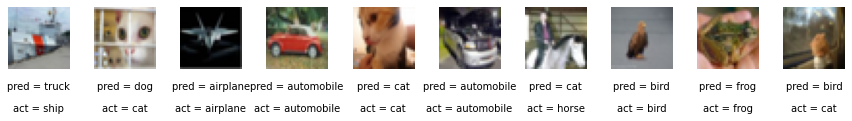

In [411]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10 , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10 , ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [612]:
layer = model.get_layer(name='conv2d_10')
feature_extractor = Model(inputs=input_layer, outputs=layer.output)
feature_extractor.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_21 (Bat  (None, 16, 16, 32)       128       
 chNormalization)                                          

In [651]:
def compute_loss(input_image, filter_index):
    activation = feature_extractor(input_image)
    filter_activation = activation[:, :, :, filter_index]
    return filter_activation


@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index)
    grads = tape.gradient(loss, img)
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return img


def initialize_image():
    return tf.random.uniform((1, 32, 32, 3))


def visualize_filter(filter_index, initial_image):
    iterations = 10
    learning_rate = 20
    img = initial_image
    for iteration in range(iterations):
        img = gradient_ascent_step(img, filter_index, learning_rate)
    img = deprocess_image(img[0].numpy())
    return img


def deprocess_image(img):
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15
    img += 0.5
    img = np.clip(img, 0, 1)
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img

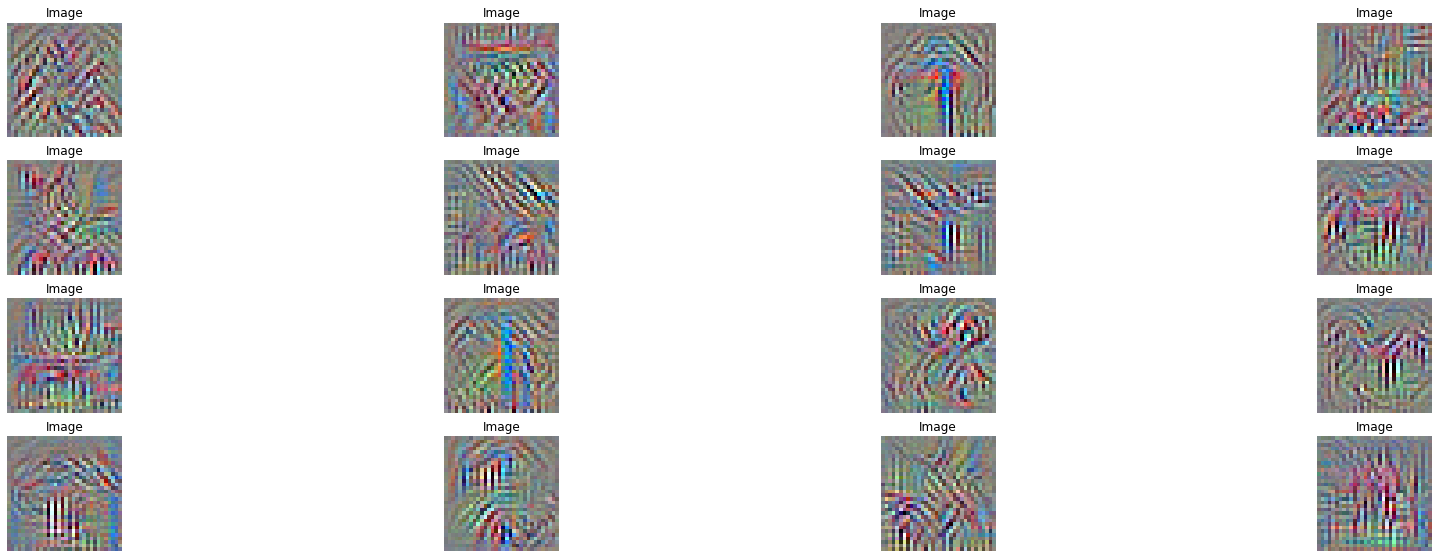

In [664]:
plt.figure(figsize=(30, 30))
im = initialize_image()

for i in range(16):
    img = visualize_filter(i * 2, im)
    ax = plt.subplot(12, 4, i + 1)
    plt.imshow(img)
    plt.title('Image')
    plt.axis("off")